# Import

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# 농업인 성별격차

Ref: [농림축산식품부 농업경영체 등록정보 현황서비스](https://edu.agrix.go.kr/uni_docs7/biOlap/dashBoard.do)

## 농업경영체 현황(농업인)_지역별 농업인 현황

> 농업인 중 성별로 차이가 있고, 경영주 및 공동경영주에서도 성별 차이 존재

In [215]:
dfs = []

years = range(2015, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체 현황(농업인)_지역별 농업인 현황.csv'
    df = pd.read_csv(file_path, header=1).iloc[:-1, :4]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수'})
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

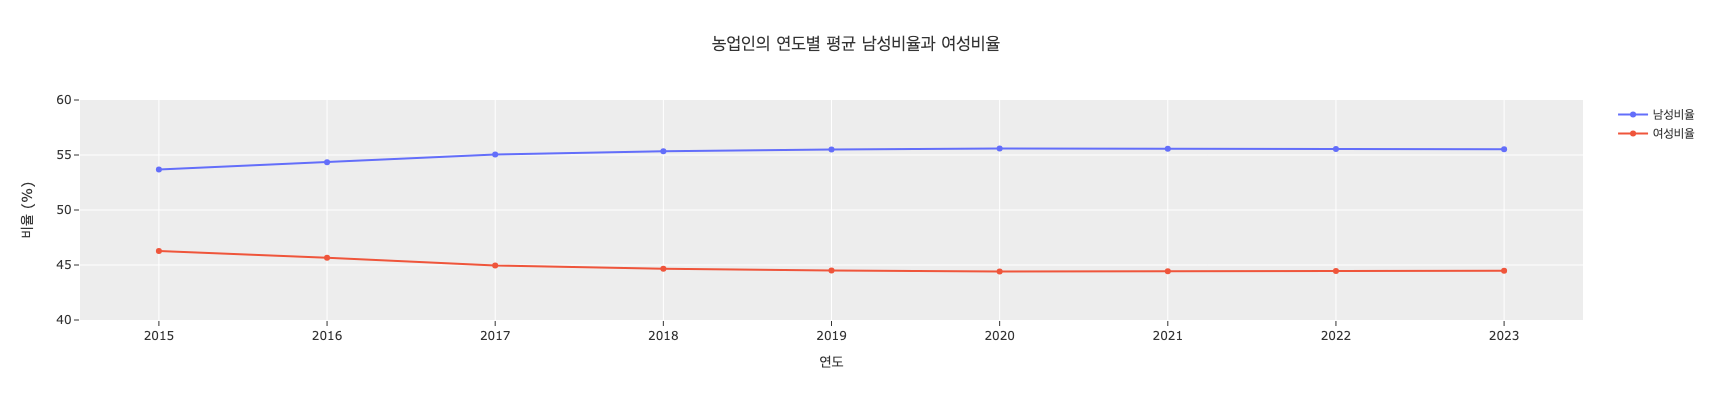

In [216]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='농업인의 연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True,
             width=800,height=400)
fig.update_layout(showlegend=True,legend_title_text="" ,
                  yaxis=dict(
                    range=[40, 60]  
    ),template='ggplot2')
fig

In [214]:
df_avg

,연도,남성비율,여성비율
0,2015,53.683529,46.275882
1,2016,54.349412,45.650588
2,2017,55.047647,44.952353
3,2018,55.345294,44.654706
4,2019,55.507647,44.492353
5,2020,55.585294,44.414706
6,2021,55.561176,44.438824
7,2022,55.555294,44.444706
8,2023,55.520588,44.479412


In [217]:
dfs = []

years = range(2015, 2024)
ages = ['40대 이하','50대','60대','70대 이상']

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체 현황(농업인)_지역별 농업인 현황.csv'
    df = pd.DataFrame(pd.read_csv(file_path,header=1).iloc[-1,[1,2,3] + list(range(4, 17))]).T.rename(columns={'Unnamed: 1': '농업인수'}).apply(pd.to_numeric, errors='coerce')
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2)).assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2)).assign(연도 = year)
    df['40대 이하'] = df['25세 미만']+df['25~29세']+df['30~34세']+df['35~39세']+df['40~44세']+df['45~49세']
    df['50대'] = df['50~54세']+df['55~59세']
    df['60대'] = df['60~64세']+df['65~69세']
    df['70대 이상'] = df['70~74세']+df['75~79세']+df['80세 이상']
    df = df.apply(pd.to_numeric, errors='coerce')
    for age in ages:
        df[age + ' '] = round((df[age] / df['농업인수']) * 100, 2)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True).iloc[:,[16,17,18]+list(range(23,27))]

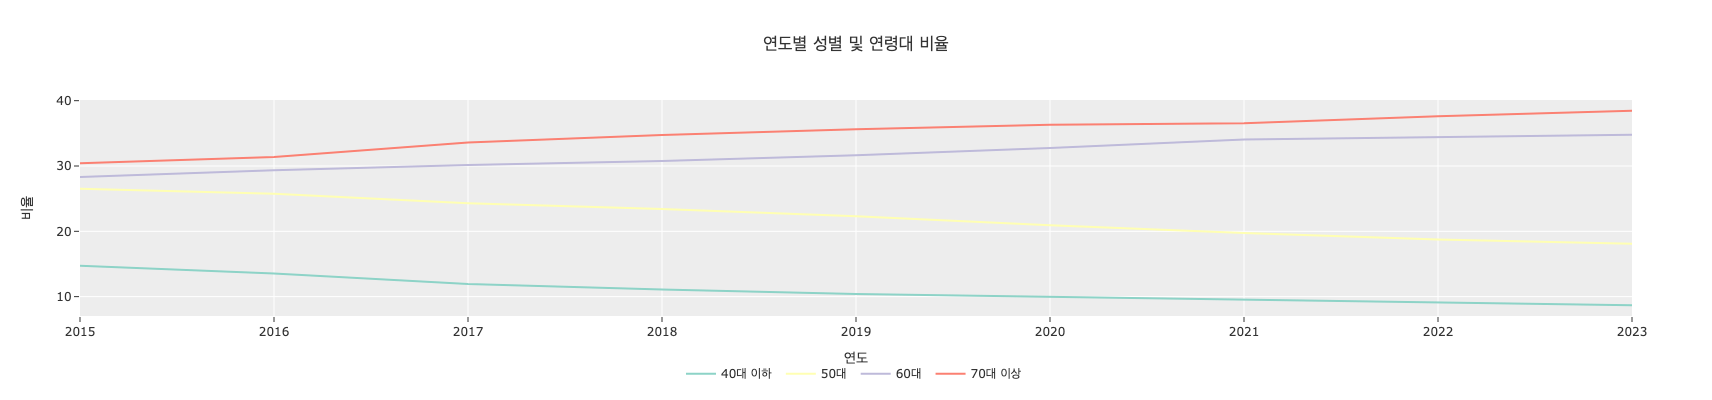

In [218]:
fig = px.line(df_all, x='연도', y=df_all.columns[2:], title='연도별 성별 및 연령대 비율',
              labels={'value': '비율', 'variable': '항목'},
              color_discrete_sequence=px.colors.qualitative.Set3,
             width = 800,height = 400)
fig.update_layout(template='ggplot2',legend_title_text="" ,
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2, 
        xanchor="center",
        x=0.5
    ))
fig.show()

In [219]:
df_all

,남성비율,여성비율,연도,40대 이하,50대,60대,70대 이상
0,52.56,47.40,2015,14.72,26.51,28.30,30.43
1,53.04,46.96,2016,13.53,25.75,29.33,31.39
2,53.76,46.24,2017,11.95,24.30,30.17,33.58
3,54.04,45.96,2018,11.10,23.41,30.75,34.74
4,54.24,45.76,2019,10.41,22.30,31.65,35.64
5,54.30,45.70,2020,9.99,20.93,32.76,36.33
6,54.21,45.79,2021,9.64,19.76,34.07,36.53
7,54.16,45.84,2022,9.20,18.74,34.43,37.63
8,54.12,45.88,2023,8.69,18.09,34.77,38.45


## 농업경영체현황(농업인)_지역별현황(경영주)

In [330]:
dfs = []

years = range(2015, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체현황(농업인)_지역별현황(경영주).xlsx'
    df = pd.read_excel(file_path, header=1).iloc[:-1, :4]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수'})
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

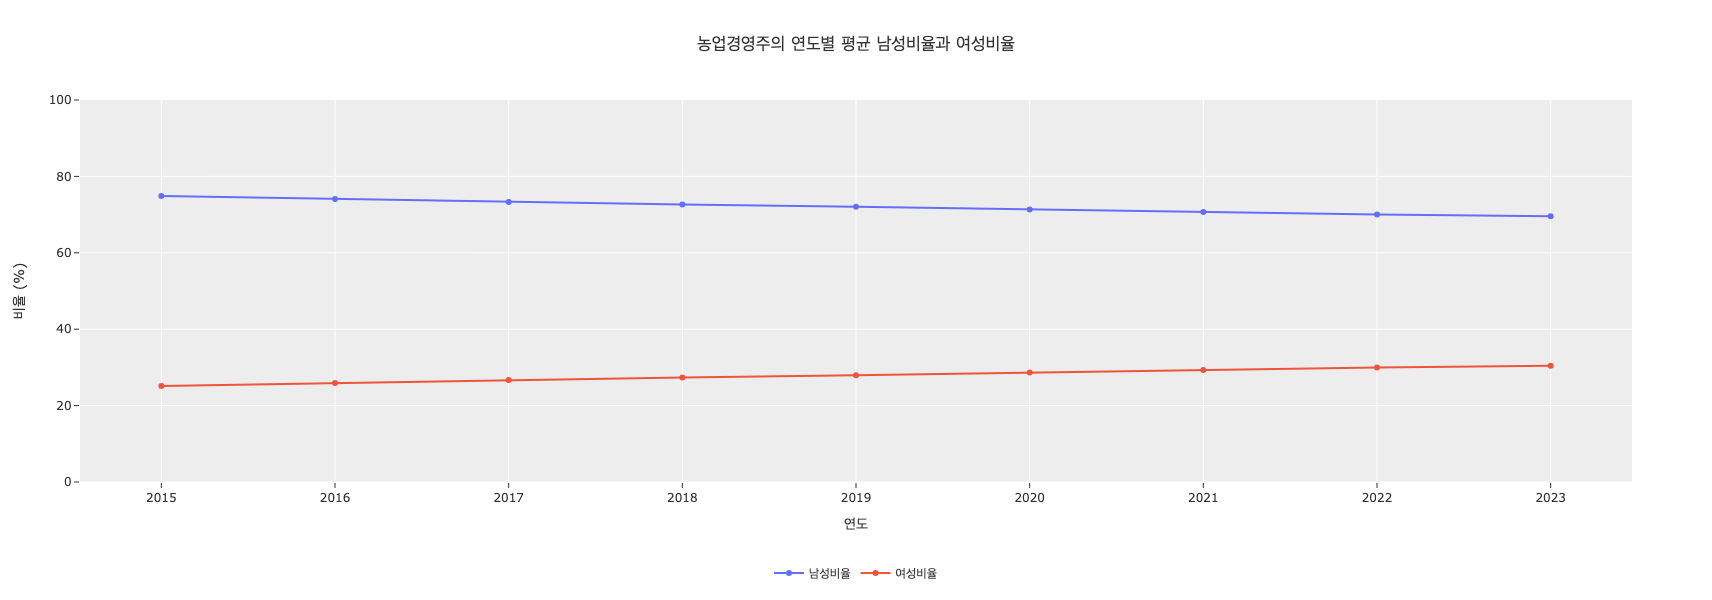

In [332]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='농업경영주의 연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True,
              width = 1000, height = 600)
fig.update_layout(showlegend=True,
                  yaxis=dict(
                    range=[0, 100]  
    ),template='ggplot2',legend_title_text="" ,
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2, 
        xanchor="center",
        x=0.5
    ))
fig

In [333]:
df_avg

,연도,남성비율,여성비율
0,2015,74.854706,25.145294
1,2016,74.067647,25.932353
2,2017,73.308824,26.691176
3,2018,72.666471,27.333529
4,2019,72.038824,27.961176
5,2020,71.351765,28.648235
6,2021,70.710000,29.290000
7,2022,70.044118,29.955882
8,2023,69.564706,30.435294


## 농업경영체현황(농업인)_지역별공동경영주현황

In [338]:
dfs = []

years = range(2018, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체현황(농업인)_지역별공동경영주현황.xlsx'
    df = pd.read_excel(file_path, header=1).iloc[:-1, [0,1,2,11]]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수','계':'남성','계.1':'여성'})
    df = df.assign(남성비율 = round((df['남성'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여성'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

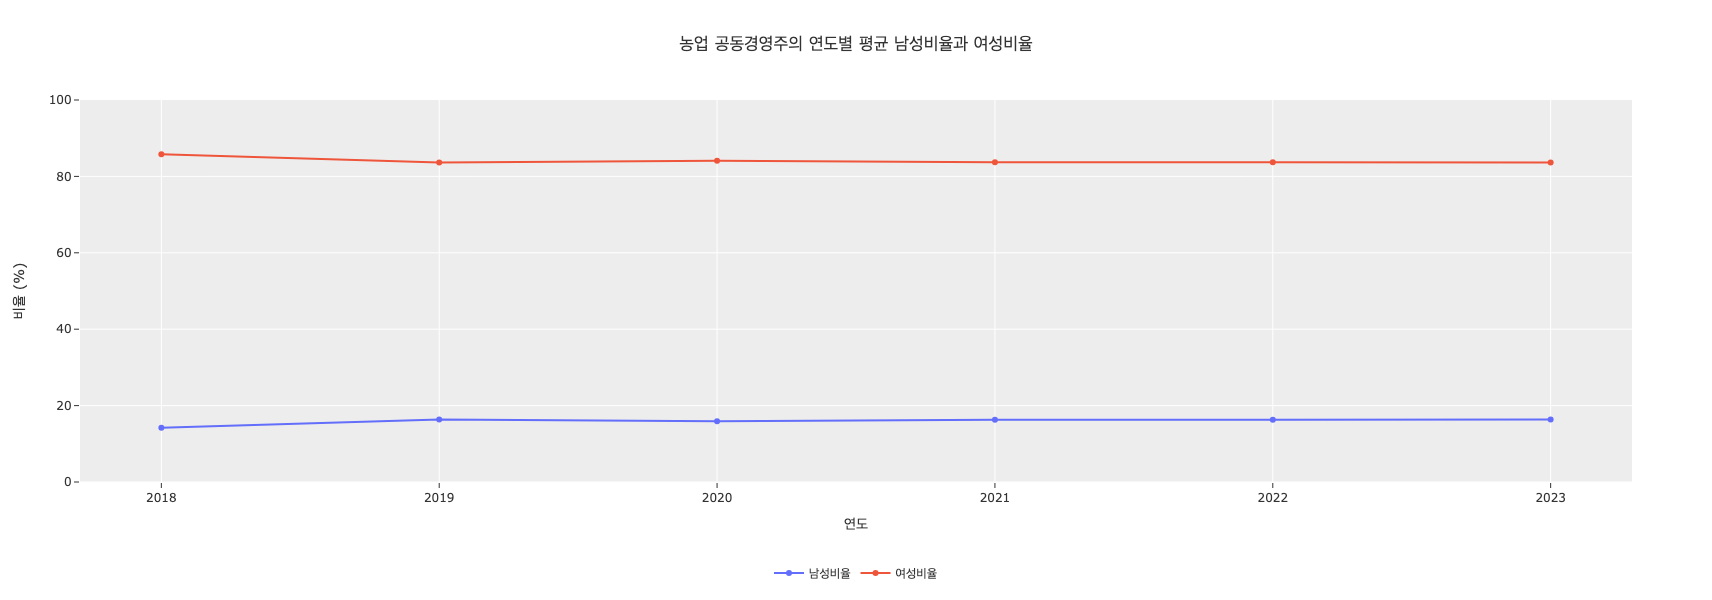

In [339]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='농업 공동경영주의 연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True,
             width = 1000, height = 600)
fig.update_layout(showlegend=True,
                  yaxis=dict(
                    range=[0, 100]  
    ),template='ggplot2',legend_title_text="" ,
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2, 
        xanchor="center",
        x=0.5
    ))
fig

In [336]:
df_avg

,연도,남성비율,여성비율
0,2018,14.230588,85.769412
1,2019,16.354706,83.645294
2,2020,15.881765,84.118235
3,2021,16.320588,83.679412
4,2022,16.292353,83.707647
5,2023,16.345294,83.654706


# 여성농업인 소득

Ref: [KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1EA1501&vw_cd=MT_ZTITLE&list_id=F1E1&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

- 연도별 농업소득 평균

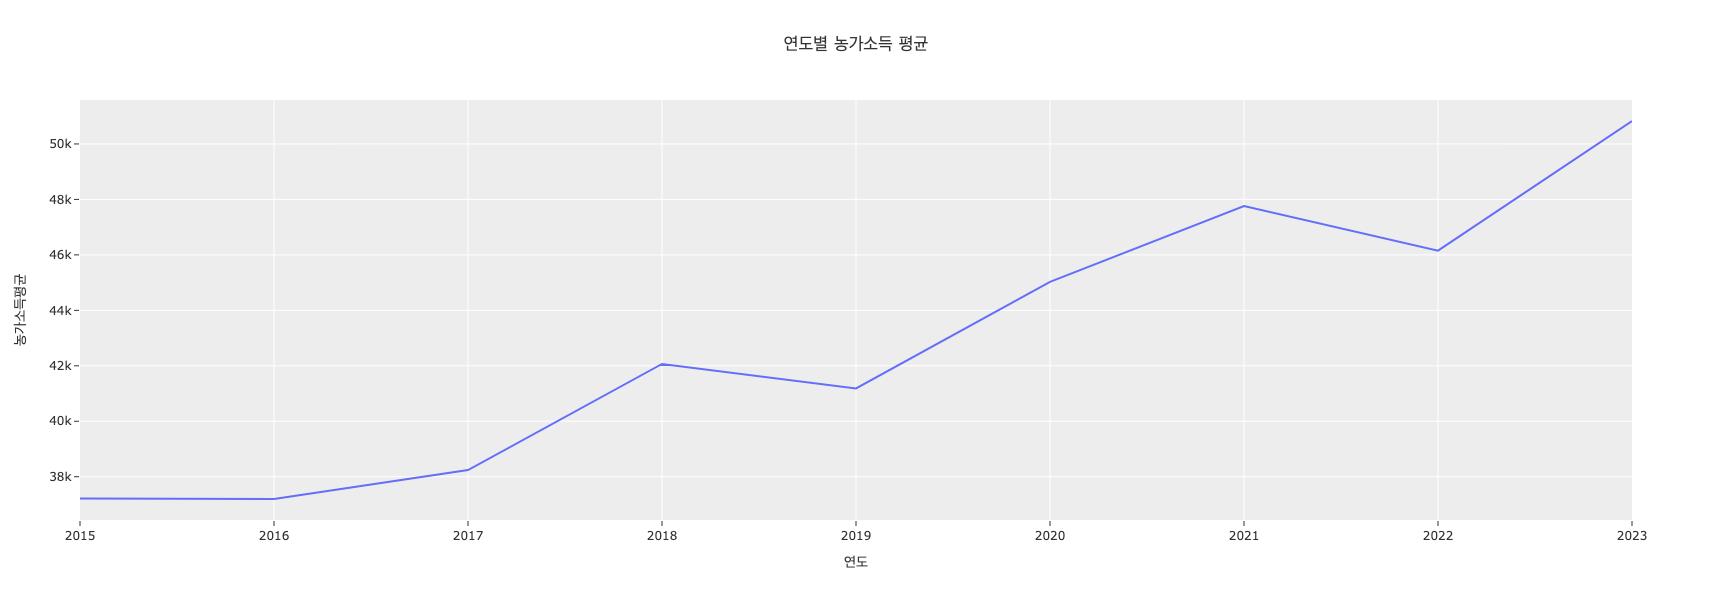

In [311]:
df = pd.DataFrame(pd.read_excel('./dataset/Farm_dataset/농가소득.xlsx').iloc[1,1:]).reset_index().rename(columns={'index':'Year',1:'Income'})
fig = px.line(df, x='Year', y='Income', title='연도별 농가소득 평균',
              labels={'Year': '연도', 'Income': '농가소득평균'},
             width = 1000, height = 600)
fig.update_layout(template='ggplot2')

fig.show()

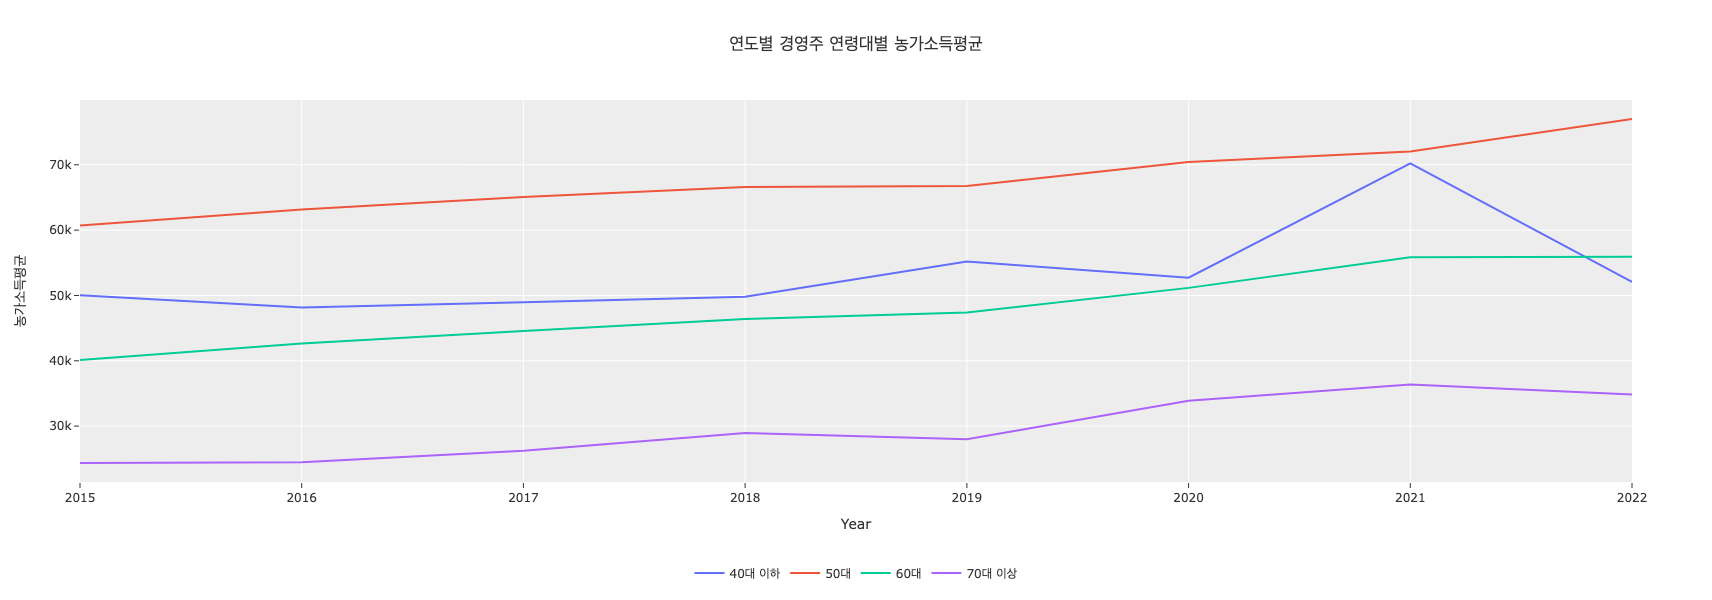

In [324]:
df = pd.read_excel('./dataset/Farm_dataset/농가소득.xlsx').iloc[2:,:].T.iloc[1:,:].reset_index().\
rename(columns={'index':'Year',2:'40-49세',3:'50세 미만',4:'50-59세',5:'60-69세',6:'70세 미만',7:'70세 이상'})
df['40-49세'] = pd.to_numeric(df['40-49세'], errors='coerce')
df['40-49세'] = df['40-49세'].fillna(0)
# df['50세 미만'] = pd.to_numeric(df['50세 미만'], errors='coerce')
# df['50세 미만'] = df['50세 미만'].fillna(0)
df['50-59세'] = pd.to_numeric(df['50-59세'], errors='coerce')
df['60-69세'] = pd.to_numeric(df['60-69세'], errors='coerce')
# df['70세 미만'] = pd.to_numeric(df['70세 미만'], errors='coerce')
# df['70세 미만'] = df['70세 미만'].fillna(0)
df['70세 이상'] = pd.to_numeric(df['70세 이상'], errors='coerce')
df['40대 이하'] = df['40-49세']#+ df['50세 미만']
df['50대'] = df['50-59세']
df['60대'] = df['60-69세']# + df['70세 미만']
df['70대 이상'] = df['70세 이상']
df = df.iloc[:-1,[0]+list(range(7,11))]
fig = px.line(df, x='Year', y=['40대 이하', '50대', '60대', '70대 이상'],
              title='연도별 경영주 연령대별 농가소득평균',
              labels={'variable': '연령대', 'value': '농가소득평균'},
             width = 1000, height = 600)
fig.update_layout(legend_title = "",template='ggplot2',
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2, 
        xanchor="center",
        x=0.5
    ))
fig.show()

# 여성농업인 지위

Ref: [국가농식물통계서비스](https://kass.mafra.go.kr/newkass/kas/sti/sti/themeConfmStats.do?trg=001)

## 거주_지역사회에서_여성의_지위_인식

- 연령별

In [177]:
df = pd.read_csv('dataset/Farm_dataset/2022_거주_지역사회에서_여성의_지위_인식.csv',header=1).iloc[7:11,1:] #2023자료임

In [178]:
age_groups = df['구분(2)']
values = df.set_index('구분(2)').drop(columns='사례수 (명)')

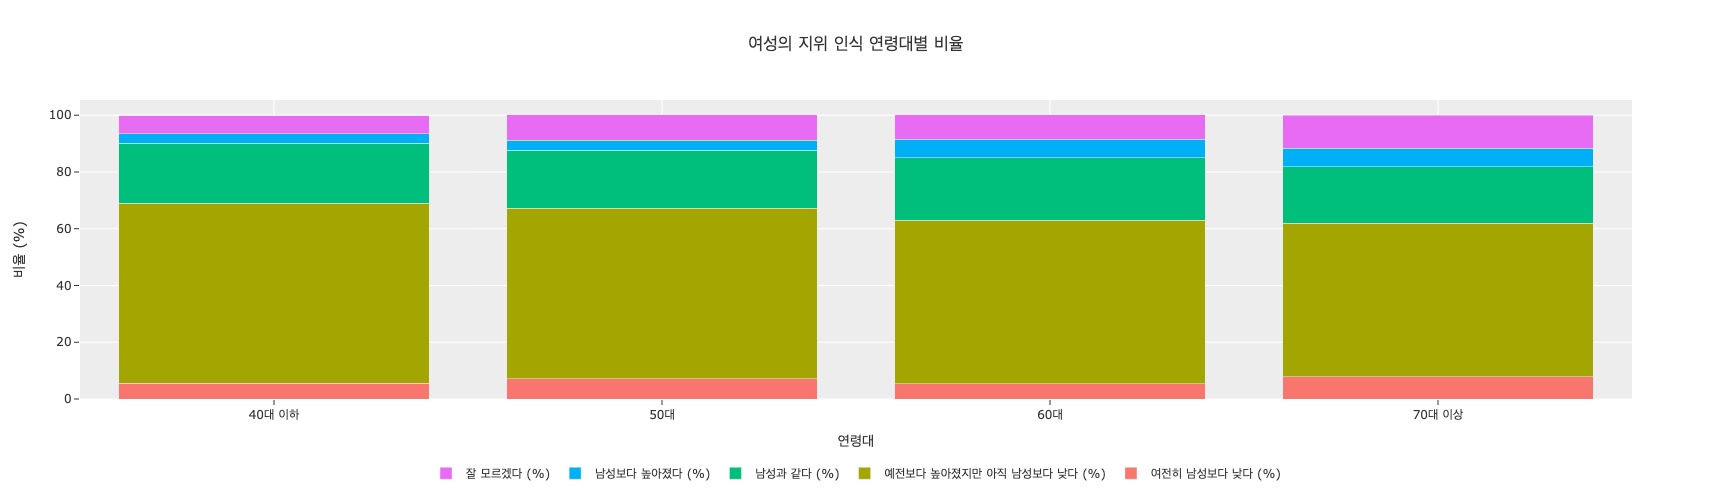

In [181]:
fig = go.Figure()

for column in values.columns:
    fig.add_trace(go.Bar(
        x=age_groups,
        y=values[column],
        name=column
    ))
    
fig.update_layout(
    title='여성의 지위 인식 연령대별 비율',
    xaxis_title='연령대',
    yaxis_title='비율 (%)',
    barmode='stack',width=800,height=500,
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2, 
        xanchor="center",
        x=0.5
    )
,template='ggplot2')
fig

In [182]:
df = pd.read_csv('dataset/Farm_dataset/2022_거주_지역사회에서_여성의_지위_인식.csv',header=1).iloc[4:7,1:]

In [183]:
age_groups = df['구분(2)']
values = df.set_index('구분(2)').drop(columns='사례수 (명)')

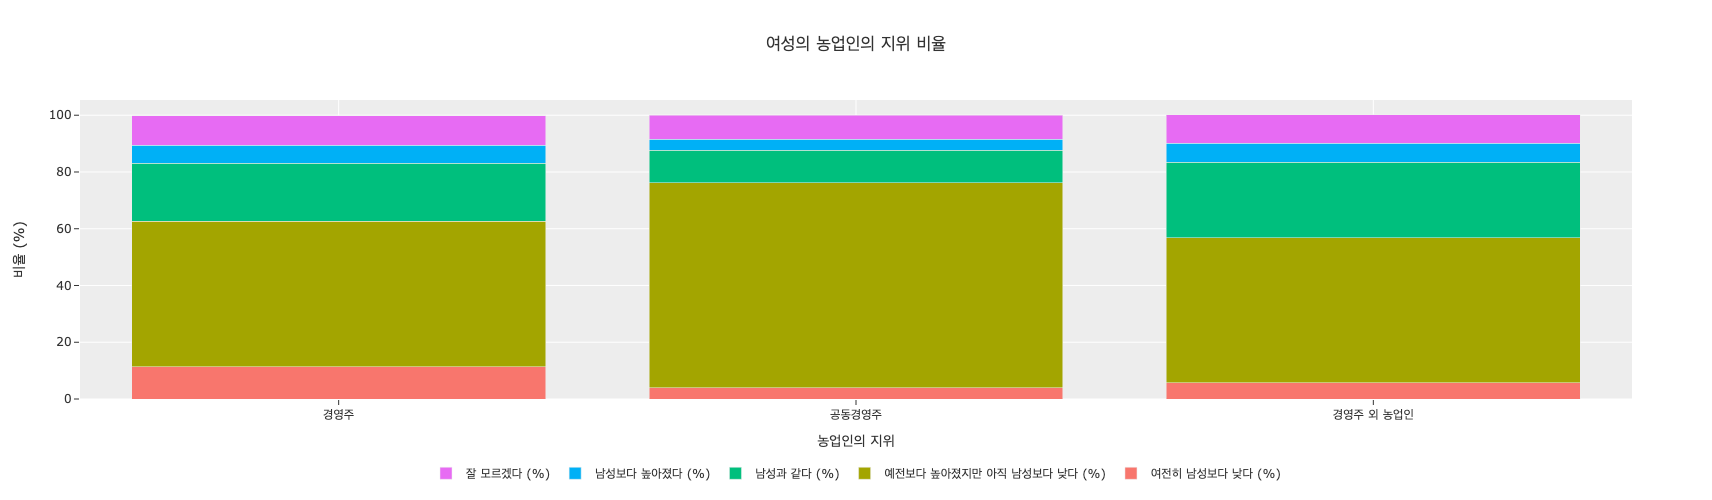

In [184]:
fig = go.Figure()

for column in values.columns:
    fig.add_trace(go.Bar(
        x=age_groups,
        y=values[column],
        name=column
    ))
fig.update_layout(
    title='여성의 농업인의 지위 비율',
    xaxis_title='농업인의 지위',
    yaxis_title='비율 (%)',
    barmode='stack',width=800,height=500,
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2, 
        xanchor="center",
        x=0.5
    )
,template='ggplot2')

fig

# 여성농업인 역량

Ref: [국가농식물통계서비스](https://kass.mafra.go.kr/newkass/kas/sti/sti/themeConfmStats.do?trg=001)

## 디지털_기술_활용_역량

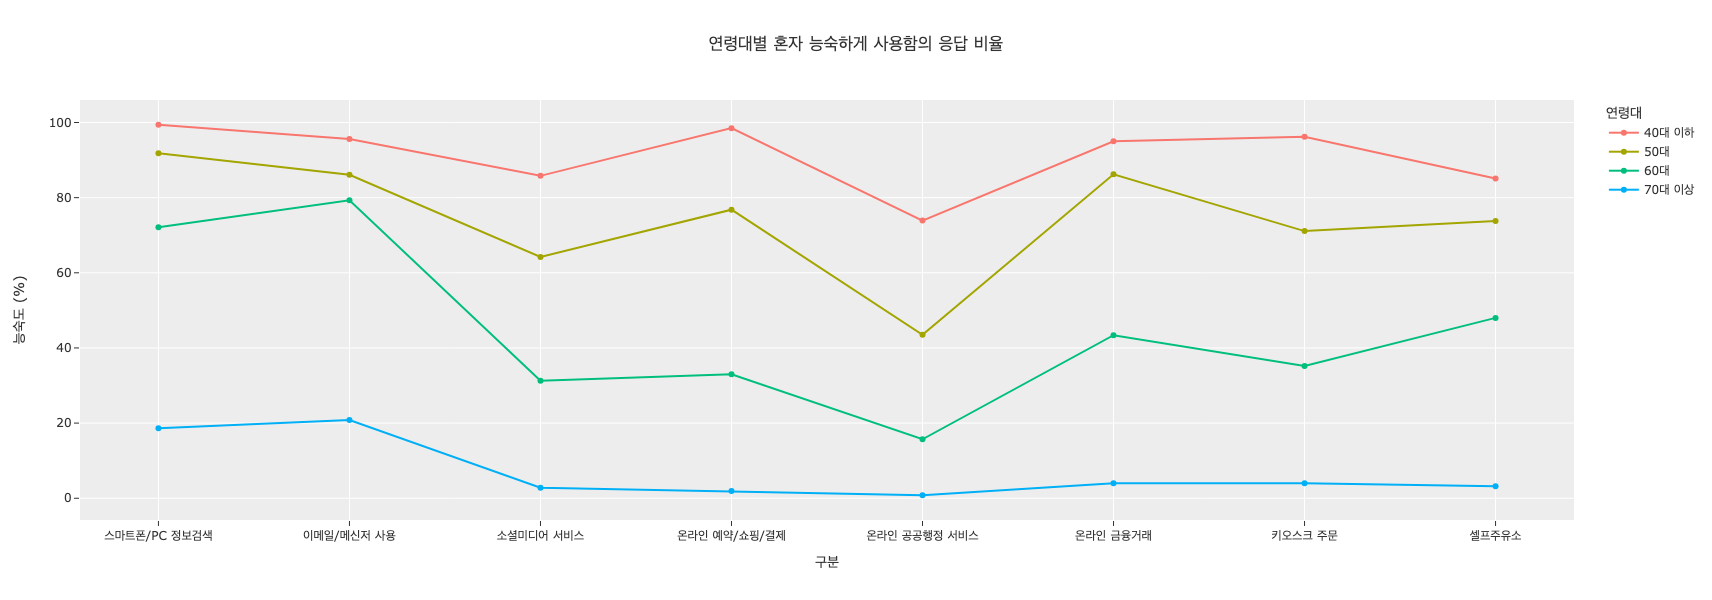

In [187]:
df = pd.read_csv('./dataset/Farm_dataset/2023_디지털_기술_활용_역량.csv',header=0).iloc[[0,1,9,10,11,12],2:].T.rename(columns={0:'구분',1:'항목',9:'40대 이하',10:'50대',11:'60대',12:'70대 이상'}).query('항목=="혼자 능숙하게 사용함 (%)"')
# 125	296	821	761
df['40대 이하'] = pd.to_numeric(df['40대 이하'], errors='coerce')
df['50대'] = pd.to_numeric(df['50대'], errors='coerce')
df['60대'] = pd.to_numeric(df['60대'], errors='coerce')
df['70대 이상'] = pd.to_numeric(df['70대 이상'], errors='coerce')

df = pd.melt(df, id_vars=['구분', '항목'], var_name='연령대', value_name='능숙도 (%)')

fig = px.line(df, x='구분', y='능숙도 (%)', color='연령대', markers=True,
              title='연령대별 혼자 능숙하게 사용함의 응답 비율',
             width=1000, height=600,template='ggplot2')

fig.show()

## 여성농업인의_자격증_보유_현황

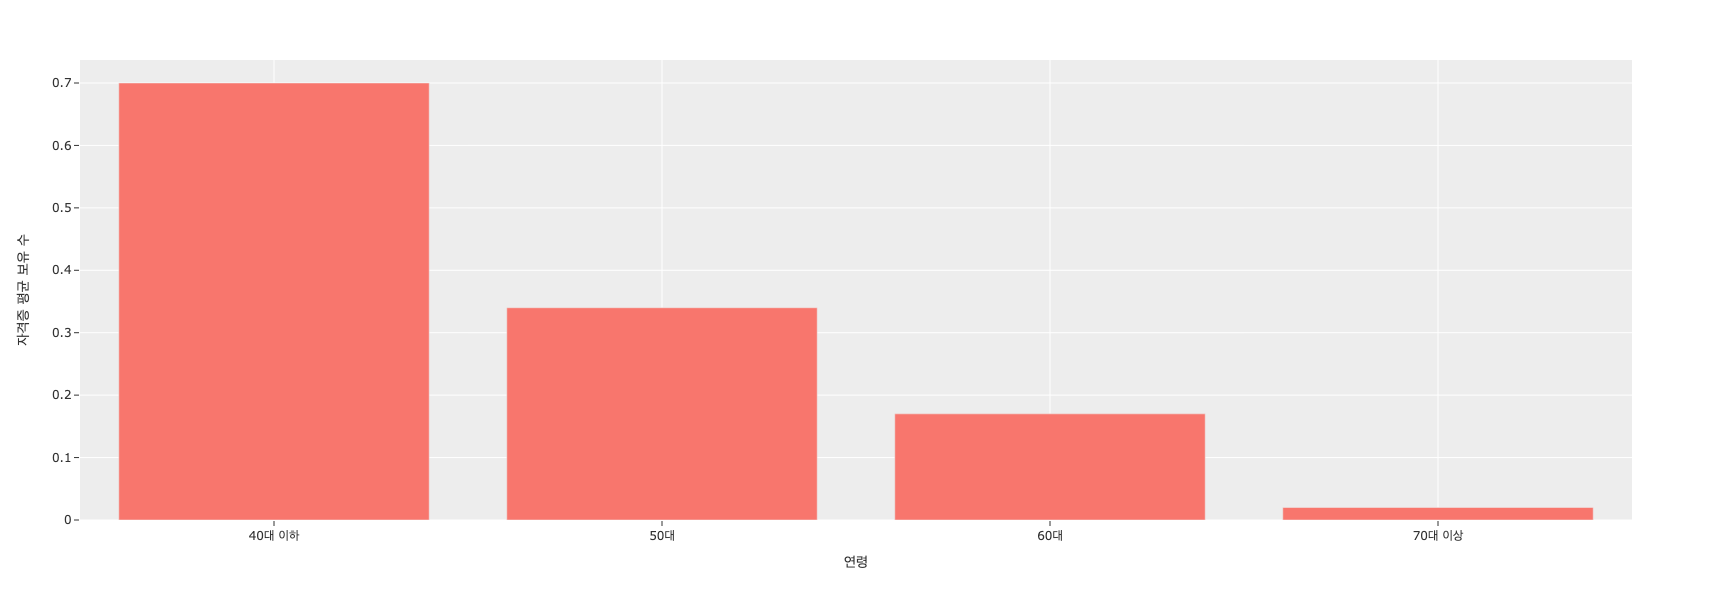

In [188]:
df = pd.read_csv('./dataset/Farm_dataset/2023_여성농업인의_자격증_보유_현황.csv').iloc[7:11,[1,-1]].rename(columns={'구분(2)':'연령','2023.4':'자격증 평균 보유 수'})
df['자격증 평균 보유 수'] = pd.to_numeric(df['자격증 평균 보유 수'], errors='coerce')
fig = px.bar(df, x='연령', y='자격증 평균 보유 수',
             width=1000, height=600,template='ggplot2')
fig.show()